In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Метод Бисекции

In [6]:
 a = 0.0; b = 2; e = 0.0001
def f(x):
    return x**4 - 3*x**3 - 6*x**2 + 2
y1 = f(a); y2 = f(b)
if y1 * y2 >= 0:
    print ("нет корней")
else:
    n = 1
    x = (a+b)/2
    y3 = f(x)
    while (abs(y3) > e):
        x = (a+b)/2
        y3 = f(x);
        if y1 * y3 < 0:
            b = x
        else:
            a = x
            n += 1
    print ("x = %15.10f" % (x))

x =    0.5235595703


# Метод Рунге-Кутта

In [6]:
# начальные условия
x0 = 0
y0 = 0
# отрезок [x0, xn], где x0 = 0, xn = 1
xn = 2
# шаг
n = 10
h = (xn-x0)/n

f1 = lambda x, y: (math.cos(x)/(1.5+x))+0.1*y**2
ilist1 = np.arange(x0, xn+h, h)`
xlist1 = [(x0+h) for h in ilist1]
ylist1 = []
prevy1 = y0
ylist1.append(prevy1)
print("\nметод Рунге-Кутта")
for x in xlist1:
    k1=f1(x,prevy1)
    k2=f1(x+h/2,prevy1+(h*k1)/2)
    k3=f1(x+h,prevy1-h*k1+2*h*k2)
    y1 = prevy1 + (h/6)*(k1+4*k2+k3)
    if (x!=1):
        prevy1 = y1
        ylist1.append(prevy1)  
for y in ylist1:
    print(y)
    
print(ilist1)    

plt.rc('font',**{'family':'verdana'})
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xlist1, ylist1, "y-", label="метод Рунге-Кутта",linewidth=3)
plt.legend()
plt.grid()
plt.show()

SyntaxError: invalid syntax (2641597715.py, line 11)

In [ ]:
points = [
    (0, 29.8),
    (2, 22.9),
    (4, 17.1),
    (5, 15.16),
    (8, 10.7),
    (10, 10.2),
    (12, 10.1),
    (15, 25.2),
]

# Метод наименьших квадратов

5.025
5.947177419354834


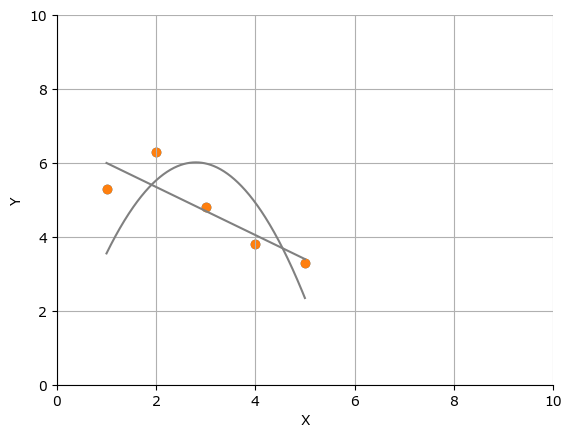

In [7]:
points = [
    (1, 5.3),
    (2, 6.3),
    (3, 4.8),
    (4, 3.8),
    (5, 3.3),
]
def draw(points, p, new_h, x_lim=(0, 3), y_lim=(-200, 200)):
    x_vec = [point[0] for point in points]
    y_vec = [point[1] for point in points]
 
    plt.scatter(x_vec, y_vec)
 
    new_x = []
    x = min(x_vec)
    x_n = max(x_vec)
    while x <= x_n:
        new_x.append(x)
        x += new_h
 
    new_x.append(x_n)
 
    new_y = [p(x) for x in new_x]
 
    plt.plot(new_x, new_y, 'gray')
 
 
def linear_function(points):
    x_vec = [point[0] for point in points]
    y_vec = [point[1] for point in points]
    n = len(points)
 
    sum_x = sum(x_vec)
    sum_y = sum(y_vec)
    sum_x2 = sum(map(lambda x: x ** 2, x_vec))
    sum_xy = np.dot(np.array(x_vec), np.array(y_vec))
 
    slu = np.array([[n, sum_x], [sum_x, sum_x2]])
    b = np.array([sum_y, sum_xy])
 
    a0, a1 = np.linalg.solve(slu, b)
 
    def f(x):
        return a1 * x + a0
    print(f(2.5))
    
    return f

def quadratic_function(points):
    x_vec = [point[0] for point in points]
    y_vec = [point[1] for point in points]
    n = len(points)
 
    mx = 1 / n * sum(x_vec)
    mx2 = 1 / n * sum(map(lambda x: x ** 2, x_vec))
    mx3 = 1 / n * sum(map(lambda x: x ** 3, x_vec))
    mx4 = 1 / n * sum(map(lambda x: x ** 4, x_vec))
    my = 1 / n * sum(y_vec)
    mxy = 1 / n * np.dot(np.array(x_vec), np.array(y_vec))
    mx2y = 1 / n * np.dot(np.array(list(map(lambda x: x ** 2, x_vec))), np.array(y_vec))
 
    slu = np.array([[mx4, mx3, mx2], [mx3, mx2, mx], [mx2, mx, n]])
    b = np.array([mx2y, mxy, my])
 
    a0, a1, a2 = np.linalg.solve(slu, b)
 
    def f(x):
        return a0 * x ** 2 + a1 * x + a2
    print(f(2.5))
 
    return f

lin = linear_function(points)
draw(points, lin, 0.01, x_lim=(0, 10), y_lim=(-30, 30))
quadro = quadratic_function(points)
draw(points, quadro, 0.01, x_lim=(0, 10), y_lim=(-30, 30))

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
 
plt.show()
